In [1]:
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Encapsulation import *
from Linear import *
from NonLinear import *
from Loss import *

In [2]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)


X_train, y_train = load_usps("data/USPS_train.txt")
X_test, y_test = load_usps("data/USPS_test.txt")

In [3]:
print(X_train.shape)

(7291, 256)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
def normalize(data_x):
    x_min=np.min(data_x)
    x_max=np.max(data_x)
    return (data_x-x_min)/(1.0*(x_max-x_min))

In [6]:
X_train_norm=normalize(X_train)
X_test_norm=normalize(X_test)


In [7]:
encoder = [
    Linear(256,64),
    TanH(),
]
decoder = [
    Linear(64,256),
    Sigmoid()
]

network_usps=Sequential(encoder+decoder)
optim_usps=Optim(network_usps,BCELoss(),eps=1e-4)
results_df=optim_usps.SGD_eval(X_train,X_train,32,100,True)

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Batch:   0%|          | 0/205 [00:00<?, ?it/s]


<AxesSubplot: xlabel='epoch', ylabel='loss'>

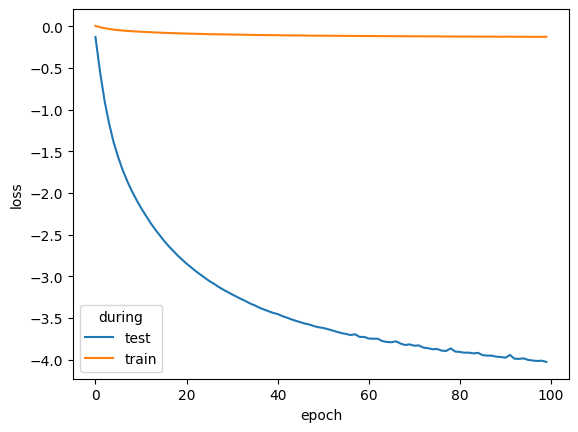

In [10]:
fig, ax = plt.subplots()
loss_long_df = pd.melt(
    results_df,
    id_vars="epoch",
    value_vars=["loss_test", "loss_train"],
    value_name="loss",
    var_name="during",
).replace({"loss_test": "test", "loss_train": "train"})
sns.lineplot(data=loss_long_df, x="epoch", y="loss", hue="during", ax=ax)

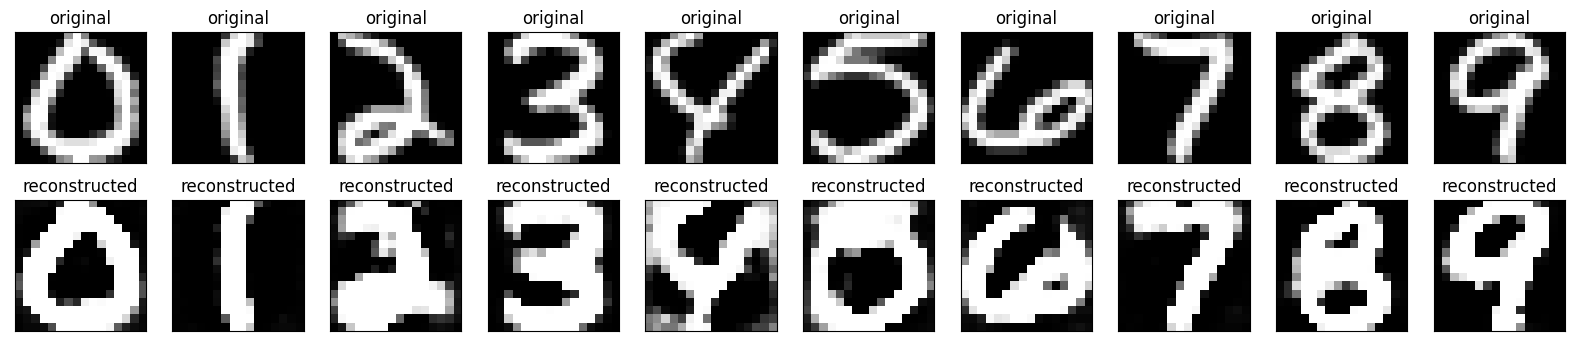

In [11]:
n = 10
decoded_imgs = network_usps.forward(X_test)
plt.figure(figsize=(20, 4))
fig.set_tight_layout(True)

for i in range(n):
    # find first class of type i
    idx = np.nonzero(y_test==i)[0][0]
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[idx].reshape(16, 16))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[idx].reshape(16, 16))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()